In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ssn = pd.read_csv('SN_ms_tot_V2.0.csv', sep=';', header=None,
                 names=[
                    'Year', 
                    'Month', 
                    'DecimalDate', 
                    'SmoothSunspotNumber', 
                    'StandardDeviation', 
                    'NumberOfObservations', 
                    'DefinitiveMarker'
                    ])

ssn.head()

,Year,Month,DecimalDate,SmoothSunspotNumber,StandardDeviation,NumberOfObservations,DefinitiveMarker
0,1749,1,1749.042,-1.0,-1.0,-1,1
1,1749,2,1749.123,-1.0,-1.0,-1,1
2,1749,3,1749.204,-1.0,-1.0,-1,1
3,1749,4,1749.288,-1.0,-1.0,-1,1
4,1749,5,1749.371,-1.0,-1.0,-1,1


In [3]:
ssn = ssn.drop(columns=['DecimalDate', 'StandardDeviation', 'NumberOfObservations', 'DefinitiveMarker'], axis=1)
ssn.head()

,Year,Month,SmoothSunspotNumber
0,1749,1,-1.0
1,1749,2,-1.0
2,1749,3,-1.0
3,1749,4,-1.0
4,1749,5,-1.0


In [4]:
ssn = ssn[ssn['SmoothSunspotNumber'] != -1]
ssn.reset_index(drop=True, inplace=True)
ssn.head()

,Year,Month,SmoothSunspotNumber
0,1749,7,135.9
1,1749,8,137.9
2,1749,9,140.2
3,1749,10,143.8
4,1749,11,146.4


In [5]:
ssn['Date'] = pd.to_datetime(ssn[['Year', 'Month']].assign(DAY=1))
ssn = ssn.drop(columns=['Year', 'Month'], axis=1)
ssn.head()

,SmoothSunspotNumber,Date
0,135.9,1749-07-01
1,137.9,1749-08-01
2,140.2,1749-09-01
3,143.8,1749-10-01
4,146.4,1749-11-01


In [6]:
ssn.tail()

,SmoothSunspotNumber,Date
3296,141.4,2024-03-01
3297,144.5,2024-04-01
3298,149.1,2024-05-01
3299,152.7,2024-06-01
3300,154.9,2024-07-01


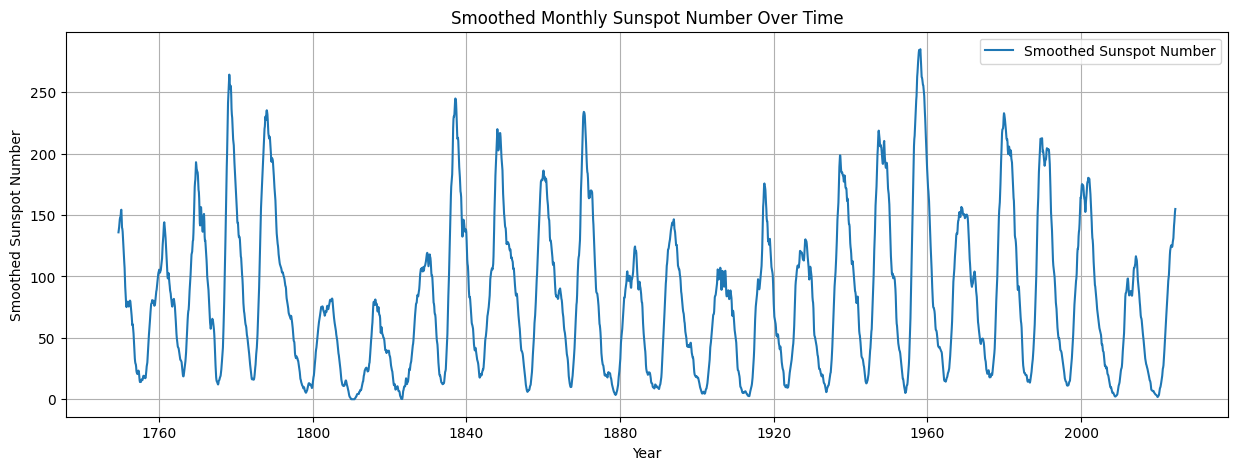

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(ssn['Date'], ssn['SmoothSunspotNumber'], label='Smoothed Sunspot Number', color='tab:blue')
plt.xlabel('Year')
plt.ylabel('Smoothed Sunspot Number')
plt.title('Smoothed Monthly Sunspot Number Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
ssn.head()

,SmoothSunspotNumber,Date
0,135.9,1749-07-01
1,137.9,1749-08-01
2,140.2,1749-09-01
3,143.8,1749-10-01
4,146.4,1749-11-01


In [10]:
ssn.columns = ['ssn', 'date']
ssn.head()

,ssn,date
0,135.9,1749-07-01
1,137.9,1749-08-01
2,140.2,1749-09-01
3,143.8,1749-10-01
4,146.4,1749-11-01


In [11]:
ssn['year'] = ssn['date'].dt.year
ssn['month'] = ssn['date'].dt.month
ssn = ssn.drop(columns=['date'], axis=1)
ssn.head()

,ssn,year,month
0,135.9,1749,7
1,137.9,1749,8
2,140.2,1749,9
3,143.8,1749,10
4,146.4,1749,11


In [12]:
ssn.to_csv('sunspot.csv', index=False)